In [1]:
import json
import os

#results_dir = "results/extendedTests/iot-coldstarts-6xni/"
#results_dir = "results/finalTests/IoT-normal-latency-7x1000/"
# results_dir = "results/finalTests/IoT-coldStart-latency-7x300/"
#results_dir = "results/finalTests/split-normal-latency-5x1000/"
#results_dir = "results/finalTests/split-coldStart-latency-6x300/"
results_dir = "results/extendedTests/empty-200/"
json_files = [pos_json for pos_json in os.listdir(results_dir) if pos_json.endswith('.json')]

data = []
for index, json_fn in enumerate(json_files):
    with open(os.path.join(results_dir, json_fn)) as in_file:
        fusion_group = json_fn.removesuffix('.json')
        content = json.load(in_file)
        print(f'Read fusion group {fusion_group} with {len(content)} lines')
        data.extend(content)

Read fusion group 1658836106 with 199 lines


In [2]:
# This is a single invocation
# data[0]

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

sns.set(rc={'figure.figsize':(6,5)}, font_scale=1.0, style='whitegrid', font='CMU Sans Serif')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rc('axes', unicode_minus=False)

def save_fig(ax, name, file_type="pdf"):
    fig = ax.get_figure()
    fig.tight_layout()
    file_name = name + "." + file_type
    fig.savefig(os.path.join("graphs", file_name), bbox_inches='tight')


df = pd.DataFrame.from_dict(data)

# Get the smallest Start timestamp and remove it from every timestamp value
min_start_timestamp = df["startTimestamp"].min()
df["startTimestamp"] = df["startTimestamp"] - min_start_timestamp
df["endTimestamp"] = df["endTimestamp"] - min_start_timestamp
df["duration"] =  df["endTimestamp"] - df["startTimestamp"]
df["fusionGroup"] = df["fusionGroup"].str.replace(",", "/")

df

,traceId,fusionGroup,source,currentFunction,billedDuration,maxMemoryUsed,isRootInvocation,isColdStart,memory,startTimestamp,endTimestamp,internalDuration,calls,duration
0,0e97f6352236b4fb597c0e1df9d99352,1658836106,A,A,41,76,True,False,128,0,40,0,"[{'called': 'A', 'caller': 'A', 'local': True,...",40
1,817be9f05243fb6a11259018a95c3ade,1658836106,A,A,3,76,True,False,128,882,883,0,"[{'called': 'A', 'caller': 'A', 'local': True,...",1
2,5c591d3b63b6393219b6a379c87e6982,1658836106,A,A,2,76,True,False,128,1854,1855,0,"[{'called': 'A', 'caller': 'A', 'local': True,...",1
3,50c2cd45b04cbe34d0d8b543d9bc760c,1658836106,A,A,2,76,True,False,128,2853,2854,0,"[{'called': 'A', 'caller': 'A', 'local': True,...",1
4,fe5d19748eaee0d9c1960776cf5893a8,1658836106,A,A,2,76,True,False,128,3866,3867,0,"[{'called': 'A', 'caller': 'A', 'local': True,...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,4b7b89bebdbb934c793cced00f602a40,1658836106,A,A,2,79,True,False,128,194210,194210,0,"[{'called': 'A', 'caller': 'A', 'local': True,...",0
195,6bac0d4d7a05f62ac9689bc4e47ef991,1658836106,A,A,3,79,True,False,128,195204,195205,0,"[{'called': 'A', 'caller': 'A', 'local': True,...",1
196,2ef5c48f2413826fdb3827dea44bccc1,1658836106,A,A,2,79,True,False,128,196308,196309,0,"[{'called': 'A', 'caller': 'A', 'local': True,...",1
197,af595c1f91c5d8c2116098f09dc5eafb,1658836106,A,A,2,79,True,False,128,197226,197226,0,"[{'called': 'A', 'caller': 'A', 'local': True,...",0


In [4]:
print(f'Unique Invocations: {df["traceId"].nunique()}')

Unique Invocations: 199


<AxesSubplot:ylabel='billedDuration'>

findfont: Font family ['CMU Sans Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CMU Sans Serif'] not found. Falling back to DejaVu Sans.


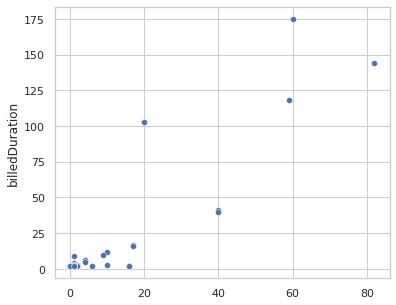

In [5]:
sns.scatterplot(data=df, x=df["endTimestamp"]-df["startTimestamp"], y="billedDuration")

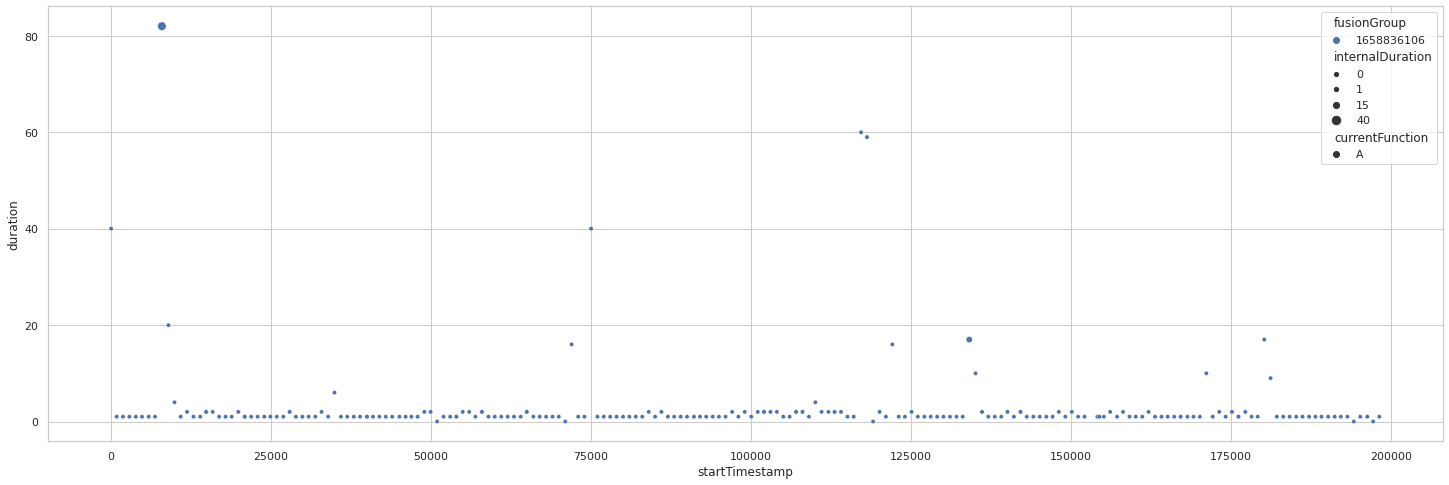

In [6]:
plt.figure(figsize=(25,8))
sns.scatterplot(data=df, x="startTimestamp", y="duration", size="internalDuration", hue=df["fusionGroup"], style="currentFunction")
plt.savefig("pointCloud.pdf")

<AxesSubplot:xlabel='startTimestamp', ylabel='10s_billedDuration_avg'>

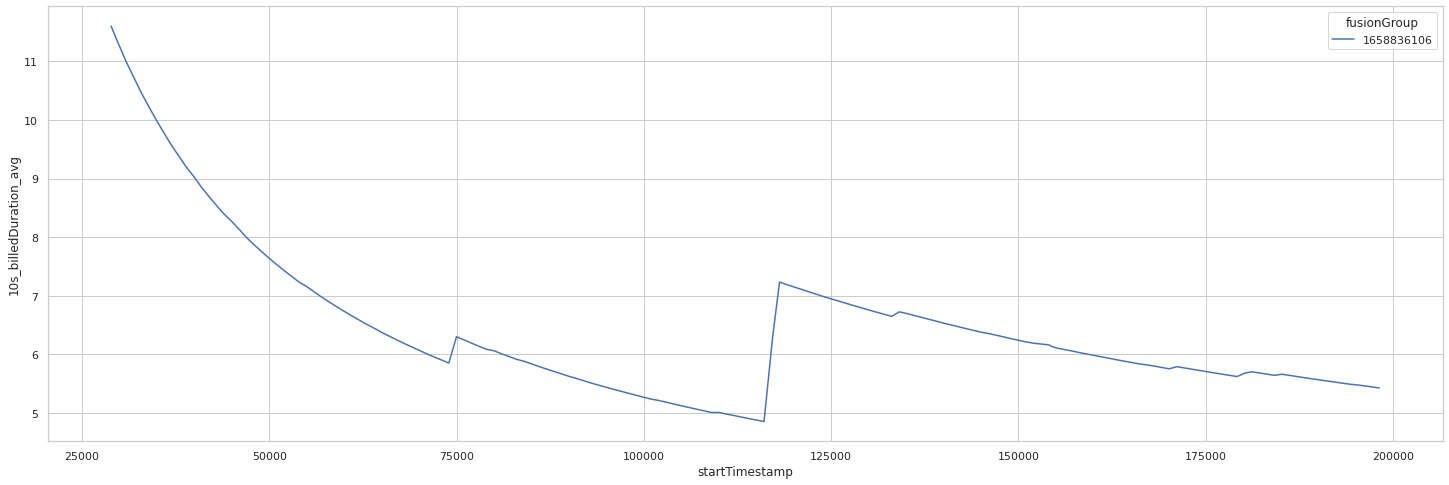

In [7]:
plt.figure(figsize=(25,8))
df['10s_billedDuration_avg'] = df['billedDuration'].rolling(10000, min_periods=30).mean()
#df['10s_billedDuration_med'] = df['billedDuration'].rolling(10000, min_periods=30).median()
sns.lineplot(data=df, x="startTimestamp", y="10s_billedDuration_avg", hue=df["fusionGroup"])
#sns.lineplot(data=df, x="startTimestamp", y="10s_billedDuration_med", hue=df["fusionGroup"])
#sns.scatterplot(data=df, x="startTimestamp", y="billedDuration", hue=df["fusionGroup"], legend=None)

In [8]:
# Now do not count every invocation, but sort the df by the cost of trace
grouped = df.groupby('traceId').agg({'billedDuration': ['sum'], 'startTimestamp': ['min'], 'endTimestamp': ['max'], 'fusionGroup': 'min'})
#grouped['numInvocations'] = df.groupby('traceId').count()
grouped['numInvocations'] = df.groupby('traceId').size()
print(f'Total Number of Invocations should be: {grouped["numInvocations"].sum()} == {len(df.index)}')

# Grouped: Get Root Invocation of TraceId and get rootEndTimestamp
# Pandas join() oder merge() machen mit dem alten Dataframe. Merge ist einfacher
rootInvocations = df[df["isRootInvocation"]][["traceId", "endTimestamp"]].rename(columns={"endTimestamp": "rootEndTimestamp"})
grouped = pd.merge(grouped, rootInvocations, how="left", on="traceId")
grouped["rootDuration"] = grouped["rootEndTimestamp"] - grouped["startTimestamp", "min"]

grouped

Total Number of Invocations should be: 199 == 199


/tmp/ipykernel_38043/2807751757.py:10: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  grouped = pd.merge(grouped, rootInvocations, how="left", on="traceId")


,traceId,"(billedDuration, sum)","(startTimestamp, min)","(endTimestamp, max)","(fusionGroup, min)","(numInvocations, )",rootEndTimestamp,rootDuration
0,0122b27838725297750ea2a900d3879c,2,150138,150140,1658836106,1,150140,2
1,02844841746b9bc224789571d7702537,3,17883,17884,1658836106,1,17884,1
2,037e415a330fd52ca4a56cfa46c56ac6,2,120098,120100,1658836106,1,120100,2
3,03998926c82a4c6beaa5ef63012e6df7,2,179196,179197,1658836106,1,179197,1
4,05c4c999654194f662a674ffa90791d5,4,80000,80001,1658836106,1,80001,1
...,...,...,...,...,...,...,...,...
194,fd9f128f83df66c0e4bace1d65eeb34b,2,126079,126080,1658836106,1,126080,1
195,fe13fddf3841d6b174b8eb722138f4fc,2,76999,77000,1658836106,1,77000,1
196,fe48763e59f20d415fb6948bf2a4c0b5,2,92989,92990,1658836106,1,92990,1
197,fe5d19748eaee0d9c1960776cf5893a8,2,3866,3867,1658836106,1,3867,1


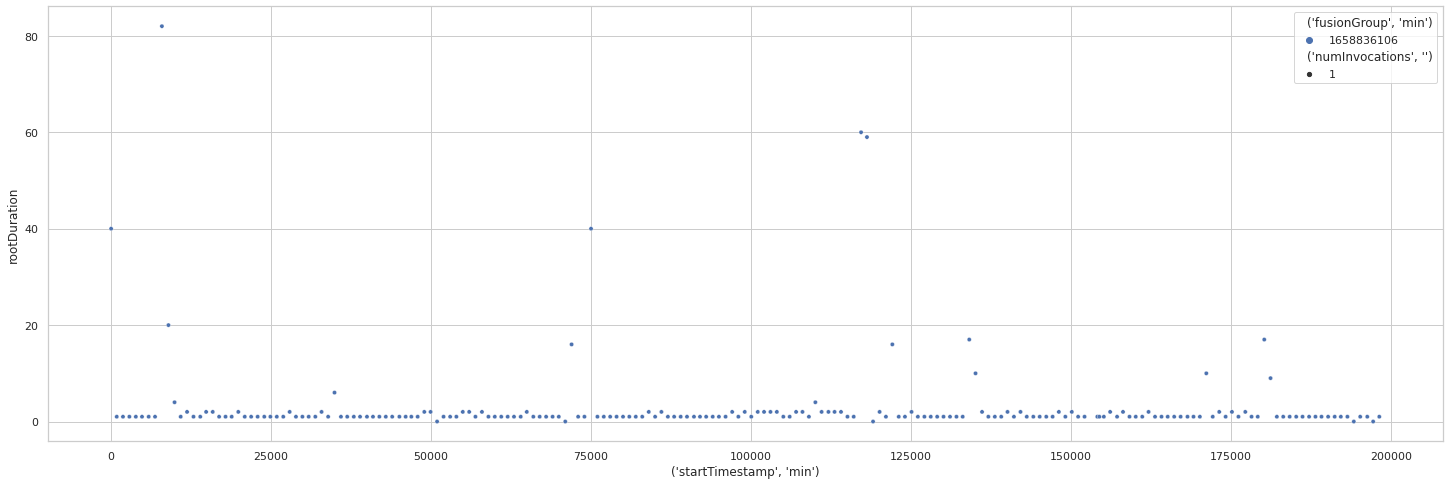

In [9]:
plt.figure(figsize=(25,8))
sns.scatterplot(data=grouped, x=grouped['startTimestamp', 'min'] , y=grouped['rootDuration'], hue=grouped['fusionGroup', 'min'], size=grouped["numInvocations", ""])
plt.savefig("duration.pdf")

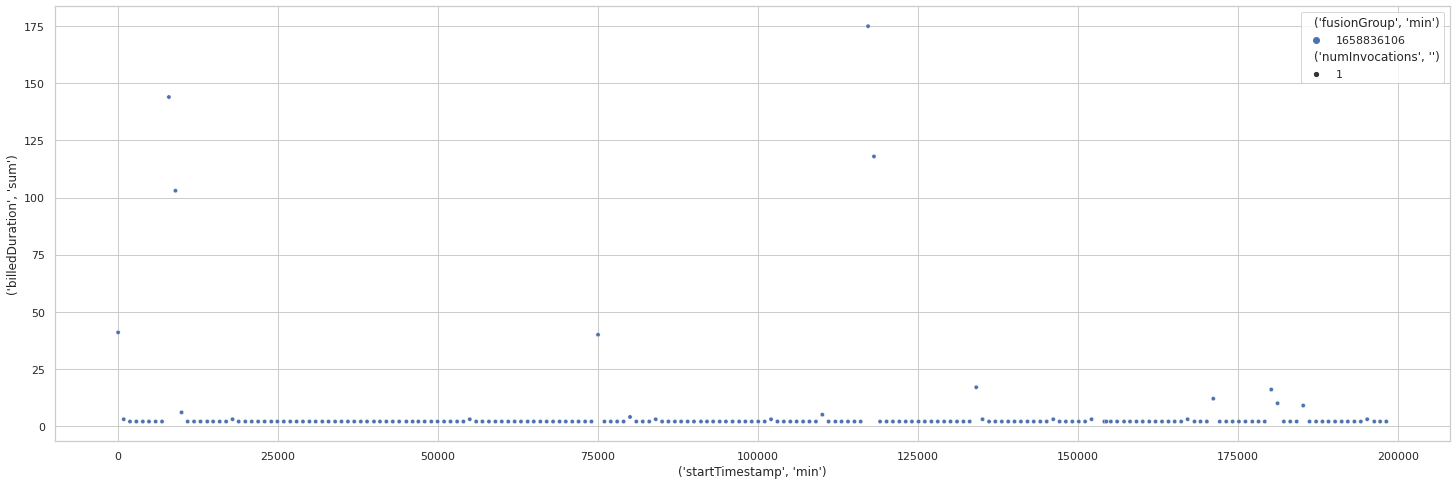

In [10]:
plt.figure(figsize=(25,8))
sns.scatterplot(data=grouped, x=grouped['startTimestamp', 'min'] , y=grouped['billedDuration', 'sum'], hue=grouped['fusionGroup', 'min'], size=grouped["numInvocations", ""])
plt.savefig("billed.pdf")

In [11]:
grouped[grouped["rootDuration"] <= 1000]

,traceId,"(billedDuration, sum)","(startTimestamp, min)","(endTimestamp, max)","(fusionGroup, min)","(numInvocations, )",rootEndTimestamp,rootDuration
0,0122b27838725297750ea2a900d3879c,2,150138,150140,1658836106,1,150140,2
1,02844841746b9bc224789571d7702537,3,17883,17884,1658836106,1,17884,1
2,037e415a330fd52ca4a56cfa46c56ac6,2,120098,120100,1658836106,1,120100,2
3,03998926c82a4c6beaa5ef63012e6df7,2,179196,179197,1658836106,1,179197,1
4,05c4c999654194f662a674ffa90791d5,4,80000,80001,1658836106,1,80001,1
...,...,...,...,...,...,...,...,...
194,fd9f128f83df66c0e4bace1d65eeb34b,2,126079,126080,1658836106,1,126080,1
195,fe13fddf3841d6b174b8eb722138f4fc,2,76999,77000,1658836106,1,77000,1
196,fe48763e59f20d415fb6948bf2a4c0b5,2,92989,92990,1658836106,1,92990,1
197,fe5d19748eaee0d9c1960776cf5893a8,2,3866,3867,1658836106,1,3867,1


['1658836106']


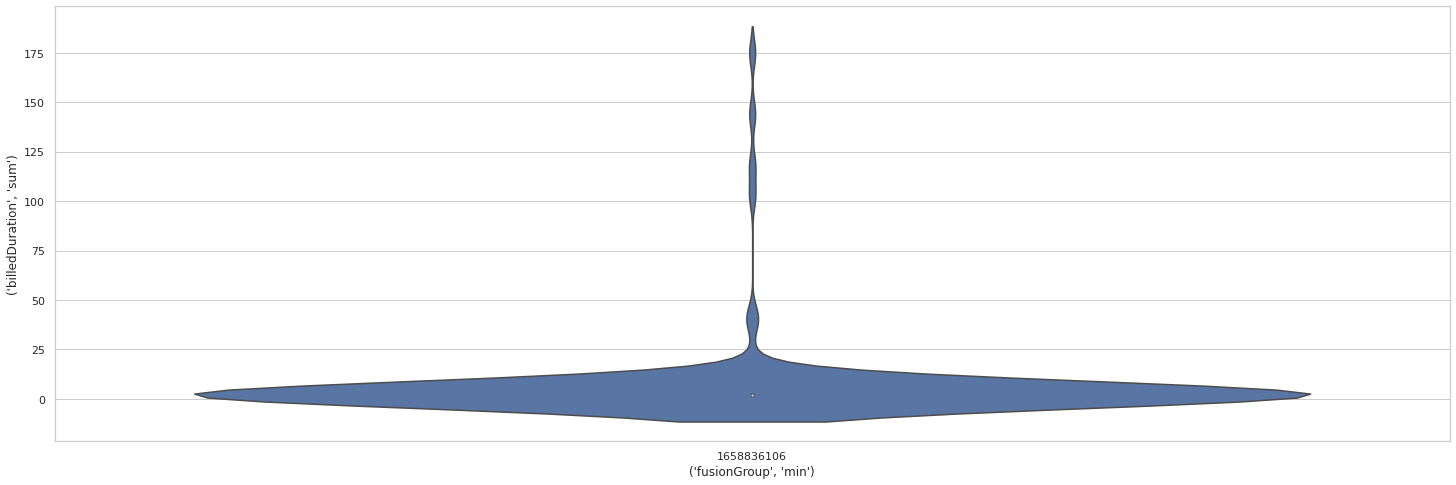

In [12]:
plt.figure(figsize=(25,8))
fusion_groups_order = pd.unique(grouped.sort_values(by="rootEndTimestamp")['fusionGroup', 'min'])
print(fusion_groups_order)
sns.violinplot(data=grouped, x=grouped['fusionGroup', 'min'] , y=grouped['billedDuration', 'sum'], order=fusion_groups_order)
plt.savefig("violinBilled.pdf")

['1658836106']


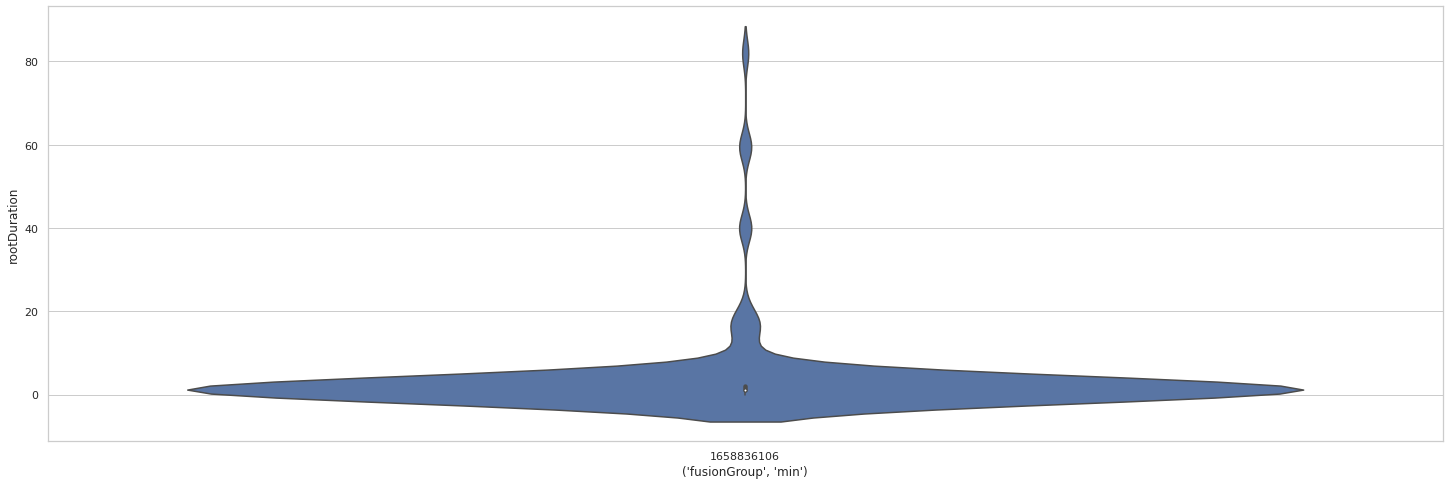

In [13]:
plt.figure(figsize=(25,8))
fusion_groups_order = pd.unique(grouped.sort_values(by="rootEndTimestamp")['fusionGroup', 'min'])
print(fusion_groups_order)
sns.violinplot(data=grouped, x=grouped['fusionGroup', 'min'] , y=grouped['rootDuration'], order=fusion_groups_order)
plt.savefig("violinRR.pdf")

AttributeError: 'NoneType' object has no attribute 'set_title'

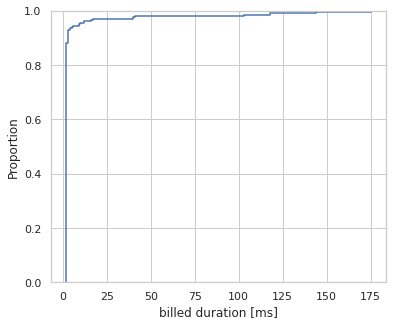

In [14]:
ax = sns.ecdfplot(data=grouped, x=grouped['billedDuration', 'sum'], hue=grouped['fusionGroup', 'min'], hue_order=fusion_groups_order, legend=None)
plt.xlabel("billed duration [ms]")
#ax.get_legend().set_title("Fusion Setup")
#ax.set(xlim=(7000,20000))
plt.savefig("ecdfBilled.pdf")

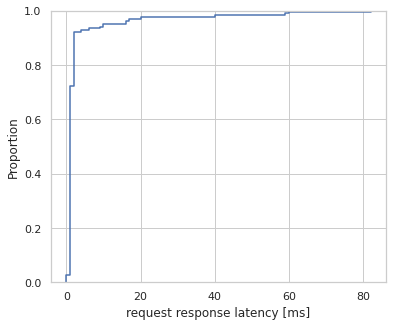

In [ ]:
ax = sns.ecdfplot(data=grouped, x=grouped['rootDuration'], hue=grouped['fusionGroup', 'min'], hue_order=fusion_groups_order, legend=None)
plt.xlabel("request response latency [ms]")
#ax.get_legend().set_title("Fusion Group")
#ax.set(xlim=(1700,4500))
plt.savefig("ecdfRR.pdf")

In [16]:
from scipy.stats import t

In [17]:
# Calculate Mean and Confidence Interval of billed duration and rootDuration

def printMeanAndCi(x, name=""):
    m = x.mean() 
    s = x.std() 
    dof = len(grouped)-1 
    confidence = 0.95

    t_crit = np.abs(t.ppf((1-confidence)/2,dof))
    print(f'Mean: {m:7.2f}, Confidence Interval: ({m-s*t_crit/np.sqrt(len(x)):7.2f} / {m+s*t_crit/np.sqrt(len(x)):7.2f}), Median: {x.median()} for {name}')

print("overall")
printMeanAndCi(grouped["rootDuration"], "rootDuration")
printMeanAndCi(grouped['billedDuration', 'sum'], "billedDuration")
for group in fusion_groups_order:
    filtered = grouped[grouped['fusionGroup', 'min'] == group]
    print(group)
    printMeanAndCi(filtered["rootDuration"], f'rootDuration')
    printMeanAndCi(filtered['billedDuration', 'sum'], f'billedDuration')

overall
Mean:    3.15, Confidence Interval: (   1.85 /    4.45), Median: 1.0 for rootDuration
Mean:    5.43, Confidence Interval: (   2.71 /    8.15), Median: 2.0 for billedDuration
1658836106
Mean:    3.15, Confidence Interval: (   1.85 /    4.45), Median: 1.0 for rootDuration
Mean:    5.43, Confidence Interval: (   2.71 /    8.15), Median: 2.0 for billedDuration


In [ ]:
df["calls"]


0      [{'called': 'A', 'caller': 'A', 'local': True,...
1      [{'called': 'A', 'caller': 'A', 'local': True,...
2      [{'called': 'A', 'caller': 'A', 'local': True,...
3      [{'called': 'A', 'caller': 'A', 'local': True,...
4      [{'called': 'A', 'caller': 'A', 'local': True,...
                             ...                        
194    [{'called': 'A', 'caller': 'A', 'local': True,...
195    [{'called': 'A', 'caller': 'A', 'local': True,...
196    [{'called': 'A', 'caller': 'A', 'local': True,...
197    [{'called': 'A', 'caller': 'A', 'local': True,...
198    [{'called': 'A', 'caller': 'A', 'local': True,...
Name: calls, Length: 199, dtype: object

In [18]:
calls = df["calls"]
calls = np.concatenate(list(calls)).ravel()
calledI = np.array(list(filter(lambda el: el["called"] == "I", calls)))
#df["acutalInternalDuration"] = df.apply(lambda row: np.vectorize(lambda obj: obj["time"])(np.array(list(filter(lambda el: el["called"] == "I",np.concatenate(list(row["calls"])).ravel())))), axis=1)

#df.apply(lambda row: np.vectorize(lambda obj: obj["time"])(np.array(list(filter(lambda el: el["called"] == "I",np.concatenate(list(row["calls"])).ravel())))), axis=1)
#np.vectorize(lambda obj: obj["time"])(calledI)

In [19]:
def get_call_time_for_row(row):
    calls = list(np.array(row["calls"]).flat)
    #calls = np.concatenate(calls).ravel()
    calledI = np.array(list(filter(lambda el: el["called"] == el["caller"], calls)))
    return  calledI[0]["time"] if len(calledI) > 0 else -1
df["actualInternalDuration"] = df.apply(lambda row: get_call_time_for_row(row), axis=1)

all: mean: 3.1256281407035176 median: 1.0 stdev: 9.272490892741379 25perc: 1.0 75perc: 2.0 90perc: 2.0 99perc: 59.02000000000001 max:81 len: 199 coldMean: 36.6 coldStd: 23.41983964268092 warmMean: 1.3544973544973544 warmStd: 1.2403857439828718



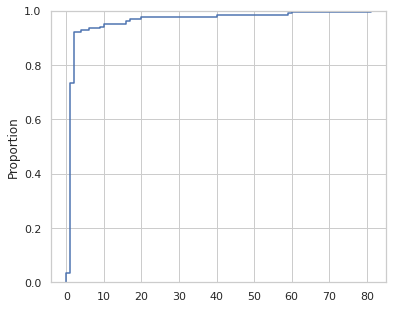

root: mean: 3.1256281407035176 median: 1.0 stdev: 9.272490892741379 25perc: 1.0 75perc: 2.0 90perc: 2.0 99perc: 59.02000000000001 max:81 len: 199 coldMean: 36.6 coldStd: 23.41983964268092 warmMean: 1.3544973544973544 warmStd: 1.2403857439828718



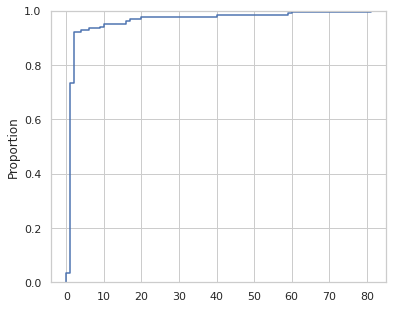

In [28]:
# Calculate the overhead of the handler

def calculate_handler_overhead(df, name = ""):
    # df = df[df["actualInternalDuration"] >= 0]
    oh = df["duration"] - df["actualInternalDuration"]
    warm = oh[oh <= 10]#oh[df["isColdStart"] == False]
    cold = oh[oh > 10]#oh[df["isColdStart"] == True]
    print(f'{name}: mean: {oh.mean()} median: {oh.median()} stdev: {oh.std()} 25perc: {oh.quantile(0.25)} 75perc: {oh.quantile(0.75)} 90perc: {oh.quantile(0.90)} 99perc: {oh.quantile(0.99)} max:{oh.max()} len: {len(oh)} coldMean: {cold.mean()} coldStd: {cold.std()} warmMean: {warm.mean()} warmStd: {warm.std()}\n')
    sns.ecdfplot(data=df, x=df["duration"] - df["actualInternalDuration"])
    plt.show()

calculate_handler_overhead(df, "all")
calculate_handler_overhead(df[df['isRootInvocation'] == True], "root")

In [26]:
df[df["isColdStart"] == True]

,traceId,fusionGroup,source,currentFunction,billedDuration,maxMemoryUsed,isRootInvocation,isColdStart,memory,startTimestamp,endTimestamp,internalDuration,calls,duration,10s_billedDuration_avg,actualInternalDuration
